# Decision Tree Classification

Decision Tree is a non-parametric supervised learning algorithm that creates a model that predicts the target value by learning simple decision rules inferred from data features. The algorithm works by:

1. **Tree Structure**: Creates a tree-like model of decisions
2. **Splitting Criteria**: Uses metrics like Gini impurity or entropy to determine the best splits
3. **Recursive Partitioning**: Recursively splits the data based on feature values
4. **Classification**: Makes predictions by following the path from root to leaf

In this notebook, we'll implement Decision Tree for a classification task to predict whether a user will purchase a product based on their age and estimated salary using the Social Network Ads dataset.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import export_text, plot_tree

## Importing the dataset

We're using the 'Social_Network_Ads.csv' dataset which contains information about users including their age, estimated salary, and whether they purchased a product (1) or not (0).

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Exploring the dataset

In [3]:
print("Dataset shape:", dataset.shape)
print("\nFirst 5 rows:")
print(dataset.head())
print("\nDataset info:")
print(dataset.info())
print("\nClass distribution:")
print(dataset['Purchased'].value_counts())
print("\nStatistical summary:")
print(dataset.describe())

Dataset shape: (400, 3)

First 5 rows:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None

Class distribution:
Purchased
0    257
1    143
Name: count, dtype: int64

Statistical summary:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000   

## Data Visualization

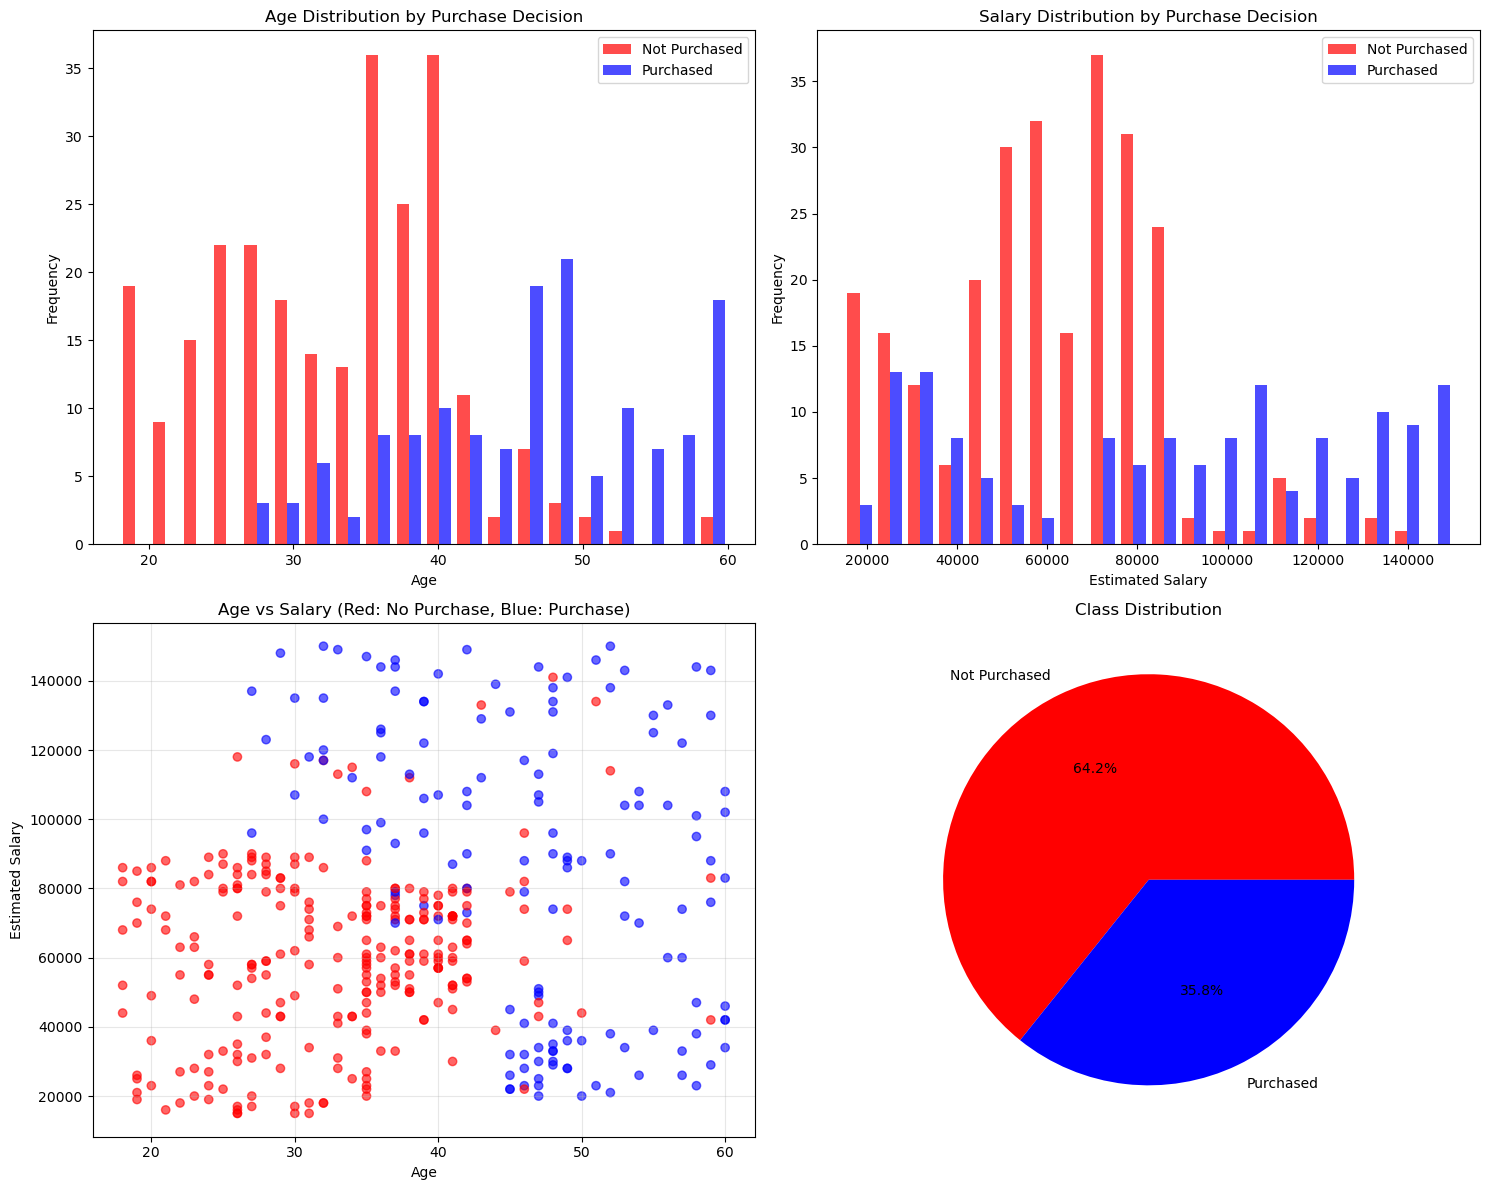

In [4]:
# Create visualizations to understand the data
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution by purchase decision
axes[0, 0].hist([dataset[dataset['Purchased'] == 0]['Age'], dataset[dataset['Purchased'] == 1]['Age']], 
                bins=20, alpha=0.7, label=['Not Purchased', 'Purchased'], color=['red', 'blue'])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution by Purchase Decision')
axes[0, 0].legend()

# Salary distribution by purchase decision
axes[0, 1].hist([dataset[dataset['Purchased'] == 0]['EstimatedSalary'], dataset[dataset['Purchased'] == 1]['EstimatedSalary']], 
                bins=20, alpha=0.7, label=['Not Purchased', 'Purchased'], color=['red', 'blue'])
axes[0, 1].set_xlabel('Estimated Salary')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Salary Distribution by Purchase Decision')
axes[0, 1].legend()

# Scatter plot
colors = ['red' if x == 0 else 'blue' for x in dataset['Purchased']]
axes[1, 0].scatter(dataset['Age'], dataset['EstimatedSalary'], c=colors, alpha=0.6)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Estimated Salary')
axes[1, 0].set_title('Age vs Salary (Red: No Purchase, Blue: Purchase)')
axes[1, 0].grid(True, alpha=0.3)

# Class distribution pie chart
class_counts = dataset['Purchased'].value_counts()
axes[1, 1].pie(class_counts.values, labels=['Not Purchased', 'Purchased'], autopct='%1.1f%%', colors=['red', 'blue'])
axes[1, 1].set_title('Class Distribution')

plt.tight_layout()
plt.show()

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining set samples:")
print(X_train[:5])
print("\nTraining labels:")
print(y_train[:5])

Training set shape: (300, 2)
Test set shape: (100, 2)

Training set samples:
[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]]

Training labels:
[0 1 0 1 1]


## Feature Scaling

**Important Note**: Decision Trees don't require feature scaling because they make decisions based on splitting thresholds, not distances. However, we'll apply scaling for:
1. Consistency with other algorithms
2. Better visualization of decision boundaries
3. Comparison purposes

We'll also train a model without scaling to show the difference.

In [7]:
from sklearn.preprocessing import StandardScaler

# Keep original data for non-scaled model
X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Apply scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

print("Original training set:")
print(X_train_original[:5])
print("\nScaled training set:")
print(X_train_scaled[:5])

Original training set:
[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]]

Scaled training set:
[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]


## Training the Decision Tree model

We'll train Decision Tree models with different parameters to understand their behavior:
1. **Default parameters**
2. **With maximum depth constraint**
3. **With minimum samples per leaf constraint**

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Model 1: Default Decision Tree (with scaled data)
classifier_default = DecisionTreeClassifier(random_state=0)
classifier_default.fit(X_train_scaled, y_train)

# Model 2: Decision Tree with max depth constraint
classifier_depth = DecisionTreeClassifier(max_depth=5, random_state=0)
classifier_depth.fit(X_train_scaled, y_train)

# Model 3: Decision Tree with min samples leaf constraint
classifier_min_samples = DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
classifier_min_samples.fit(X_train_scaled, y_train)

# Model 4: Decision Tree without scaling (using original data)
classifier_no_scaling = DecisionTreeClassifier(random_state=0)
classifier_no_scaling.fit(X_train_original, y_train)

print("All Decision Tree models trained successfully!")

All Decision Tree models trained successfully!


## Understanding Decision Tree Parameters

In [9]:
# Compare tree properties
models = {
    'Default (Scaled)': classifier_default,
    'Max Depth=5': classifier_depth,
    'Min Samples Leaf=10': classifier_min_samples,
    'No Scaling': classifier_no_scaling
}

print("Decision Tree Model Comparison:")
print("=" * 50)
for name, model in models.items():
    print(f"\n{name}:")
    print(f"  Tree Depth: {model.tree_.max_depth}")
    print(f"  Number of Leaves: {model.tree_.n_leaves}")
    print(f"  Number of Nodes: {model.tree_.node_count}")
    
    # Get feature importance
    feature_names = ['Age', 'Salary']
    importance = model.feature_importances_
    print(f"  Feature Importance - Age: {importance[0]:.4f}, Salary: {importance[1]:.4f}")

Decision Tree Model Comparison:

Default (Scaled):
  Tree Depth: 12
  Number of Leaves: 47
  Number of Nodes: 93
  Feature Importance - Age: 0.4916, Salary: 0.5084

Max Depth=5:
  Tree Depth: 5
  Number of Leaves: 20
  Number of Nodes: 39
  Feature Importance - Age: 0.5192, Salary: 0.4808

Min Samples Leaf=10:
  Tree Depth: 5
  Number of Leaves: 13
  Number of Nodes: 25
  Feature Importance - Age: 0.5525, Salary: 0.4475

No Scaling:
  Tree Depth: 12
  Number of Leaves: 47
  Number of Nodes: 93
  Feature Importance - Age: 0.4916, Salary: 0.5084


## Visualizing the Decision Tree Structure

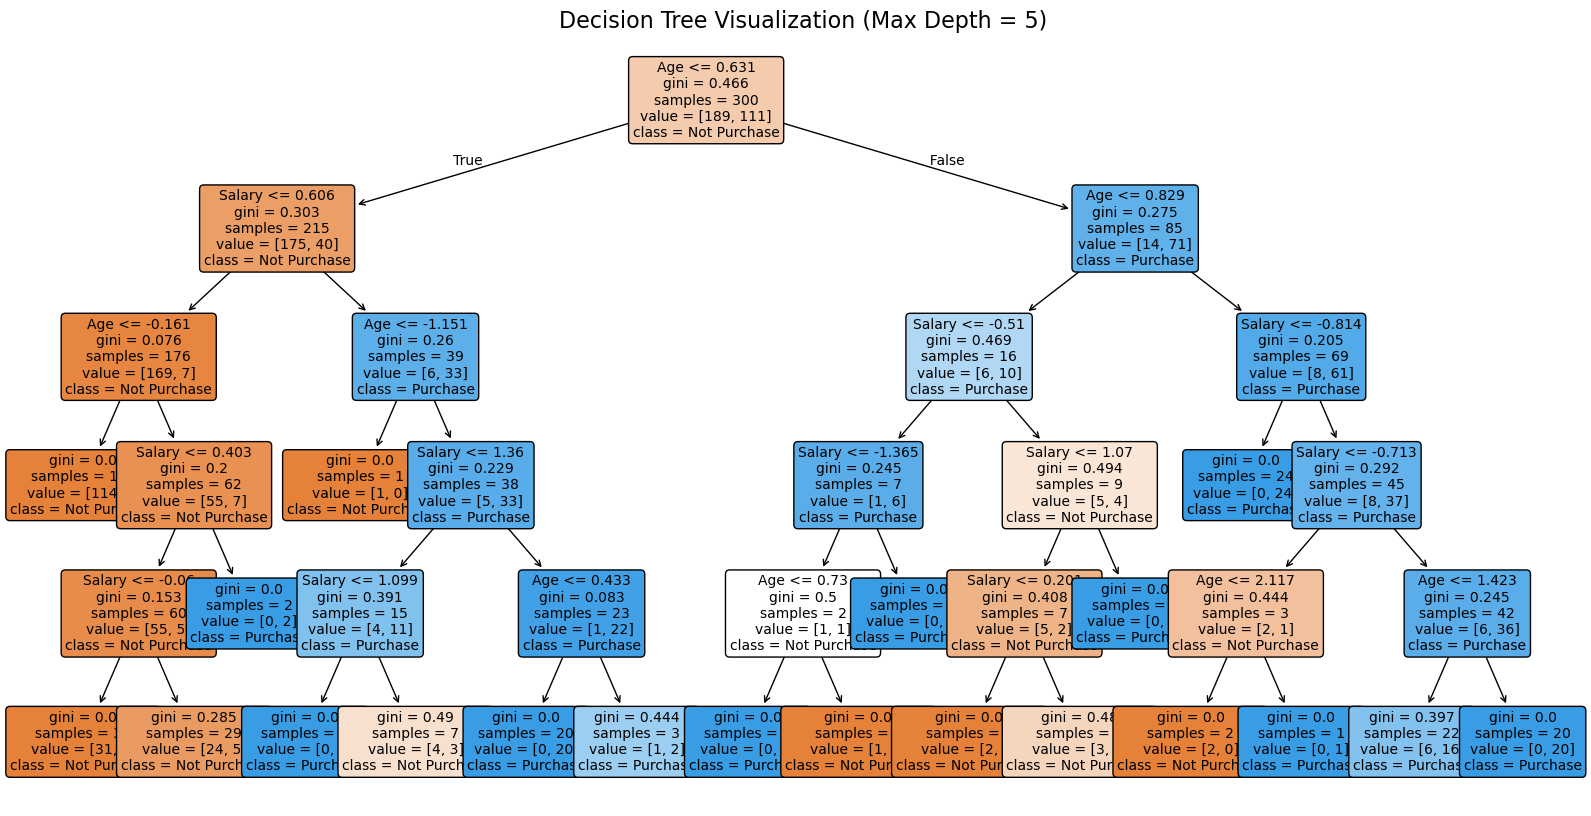


Decision Tree Rules (Max Depth = 5):
|--- Age <= 0.63
|   |--- Salary <= 0.61
|   |   |--- Age <= -0.16
|   |   |   |--- class: 0
|   |   |--- Age >  -0.16
|   |   |   |--- Salary <= 0.40
|   |   |   |   |--- Salary <= -0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Salary >  -0.06
|   |   |   |   |   |--- class: 0
|   |   |   |--- Salary >  0.40
|   |   |   |   |--- class: 1
|   |--- Salary >  0.61
|   |   |--- Age <= -1.15
|   |   |   |--- class: 0
|   |   |--- Age >  -1.15
|   |   |   |--- Salary <= 1.36
|   |   |   |   |--- Salary <= 1.10
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Salary >  1.10
|   |   |   |   |   |--- class: 0
|   |   |   |--- Salary >  1.36
|   |   |   |   |--- Age <= 0.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  0.43
|   |   |   |   |   |--- class: 1
|--- Age >  0.63
|   |--- Age <= 0.83
|   |   |--- Salary <= -0.51
|   |   |   |--- Salary <= -1.37
|   |   |   |   |--- Age <= 0.73
|   |   |   |   |   |--- class: 1


In [10]:
# Visualize the decision tree with max_depth=5 for better readability
plt.figure(figsize=(20, 10))
plot_tree(classifier_depth, 
          feature_names=['Age', 'Salary'],
          class_names=['Not Purchase', 'Purchase'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization (Max Depth = 5)', fontsize=16)
plt.show()

# Print text representation of the tree (first few levels)
print("\nDecision Tree Rules (Max Depth = 5):")
tree_rules = export_text(classifier_depth, feature_names=['Age', 'Salary'])
print(tree_rules[:1000] + "..." if len(tree_rules) > 1000 else tree_rules)

## Feature Importance Analysis

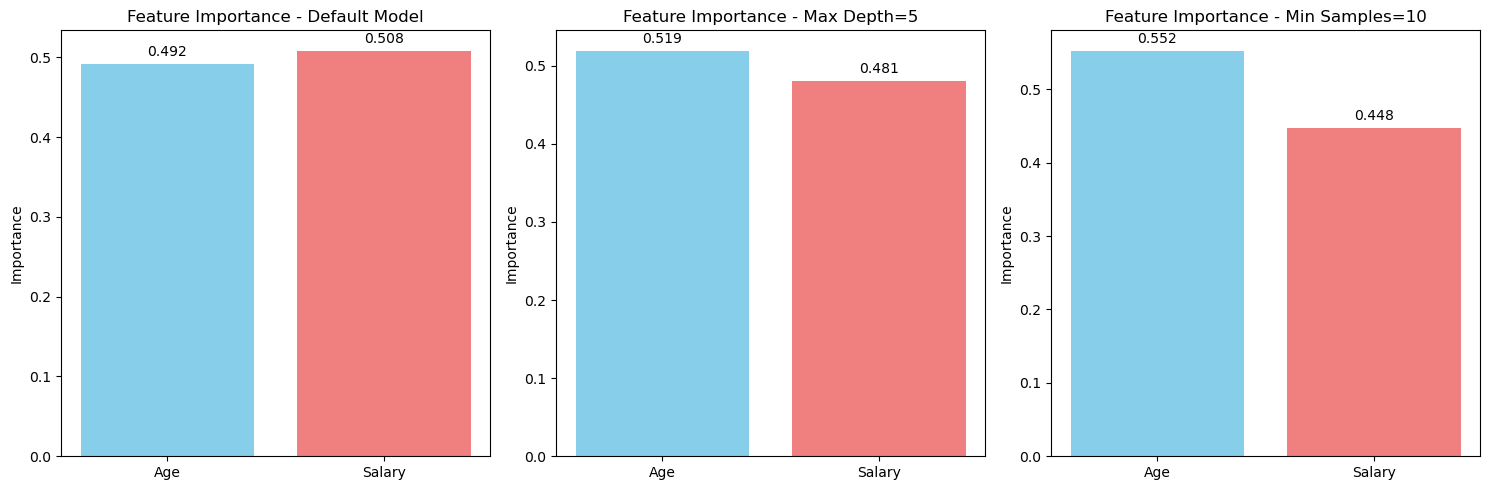

In [11]:
# Feature importance visualization
feature_names = ['Age', 'Salary']
importance_default = classifier_default.feature_importances_
importance_depth = classifier_depth.feature_importances_
importance_min_samples = classifier_min_samples.feature_importances_

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Default model
axes[0].bar(feature_names, importance_default, color=['skyblue', 'lightcoral'])
axes[0].set_title('Feature Importance - Default Model')
axes[0].set_ylabel('Importance')
for i, v in enumerate(importance_default):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Max depth model
axes[1].bar(feature_names, importance_depth, color=['skyblue', 'lightcoral'])
axes[1].set_title('Feature Importance - Max Depth=5')
axes[1].set_ylabel('Importance')
for i, v in enumerate(importance_depth):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# Min samples model
axes[2].bar(feature_names, importance_min_samples, color=['skyblue', 'lightcoral'])
axes[2].set_title('Feature Importance - Min Samples=10')
axes[2].set_ylabel('Importance')
for i, v in enumerate(importance_min_samples):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## Predicting a new result

Let's predict whether a 30-year-old person with an $87,000 salary will purchase the product using different models.

In [12]:
# Predict for a new sample
new_sample = [[30, 87000]]
new_sample_scaled = sc.transform(new_sample)

print("Predictions for [Age: 30, Salary: $87,000]:")
print("=" * 45)

prediction_default = classifier_default.predict(new_sample_scaled)
prediction_depth = classifier_depth.predict(new_sample_scaled)
prediction_min_samples = classifier_min_samples.predict(new_sample_scaled)
prediction_no_scaling = classifier_no_scaling.predict(new_sample)

print(f"Default Model (Scaled):     {prediction_default[0]}")
print(f"Max Depth=5:               {prediction_depth[0]}")
print(f"Min Samples Leaf=10:       {prediction_min_samples[0]}")
print(f"No Scaling:                {prediction_no_scaling[0]}")

# Get prediction probabilities for the default model
probabilities = classifier_default.predict_proba(new_sample_scaled)
print(f"\nDefault Model Probabilities:")
print(f"Probability of not purchasing: {probabilities[0][0]:.4f}")
print(f"Probability of purchasing: {probabilities[0][1]:.4f}")

Predictions for [Age: 30, Salary: $87,000]:
Default Model (Scaled):     0
Max Depth=5:               0
Min Samples Leaf=10:       0
No Scaling:                0

Default Model Probabilities:
Probability of not purchasing: 1.0000
Probability of purchasing: 0.0000


## Predicting the Test set results

In [13]:
# Make predictions with all models
y_pred_default = classifier_default.predict(X_test_scaled)
y_pred_depth = classifier_depth.predict(X_test_scaled)
y_pred_min_samples = classifier_min_samples.predict(X_test_scaled)
y_pred_no_scaling = classifier_no_scaling.predict(X_test_original)

# Display predictions vs actual for default model
print("Predictions vs Actual - Default Model (first 20 samples):")
comparison = np.concatenate((y_pred_default.reshape(len(y_pred_default),1), y_test.reshape(len(y_test),1)),1)
print("Predicted | Actual")
print("----------|--------")
for i in range(20):
    print(f"    {comparison[i][0]}     |    {comparison[i][1]}")

Predictions vs Actual - Default Model (first 20 samples):
Predicted | Actual
----------|--------
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    1     |    1
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    0     |    0
    1     |    0
    0     |    0
    1     |    0
    1     |    0
    0     |    0
    1     |    1
    0     |    0


## Evaluating Model Performance

We'll evaluate all our Decision Tree models using multiple metrics:

1. **Confusion Matrix** - Shows classification accuracy breakdown
2. **Accuracy Score** - Overall correct prediction percentage
3. **Classification Report** - Precision, recall, F1-score for each class
4. **Cross-validation** - Model stability assessment

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Evaluate all models
predictions = {
    'Default (Scaled)': y_pred_default,
    'Max Depth=5': y_pred_depth,
    'Min Samples Leaf=10': y_pred_min_samples,
    'No Scaling': y_pred_no_scaling
}

print("Model Performance Comparison:")
print("=" * 60)

for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Confusion Matrix:")
    print(f"    {cm}")

# Detailed evaluation for default model
print("\n" + "="*60)
print("Detailed Classification Report - Default Model:")
print("="*60)
print(classification_report(y_test, y_pred_default, target_names=['Not Purchase', 'Purchase']))

Model Performance Comparison:

Default (Scaled):
  Accuracy: 0.9000 (90.00%)
  Confusion Matrix:
    [[62  6]
 [ 4 28]]

Max Depth=5:
  Accuracy: 0.9500 (95.00%)
  Confusion Matrix:
    [[66  2]
 [ 3 29]]

Min Samples Leaf=10:
  Accuracy: 0.9400 (94.00%)
  Confusion Matrix:
    [[64  4]
 [ 2 30]]

No Scaling:
  Accuracy: 0.9000 (90.00%)
  Confusion Matrix:
    [[62  6]
 [ 4 28]]

Detailed Classification Report - Default Model:
              precision    recall  f1-score   support

Not Purchase       0.94      0.91      0.93        68
    Purchase       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



## Confusion Matrix Visualization

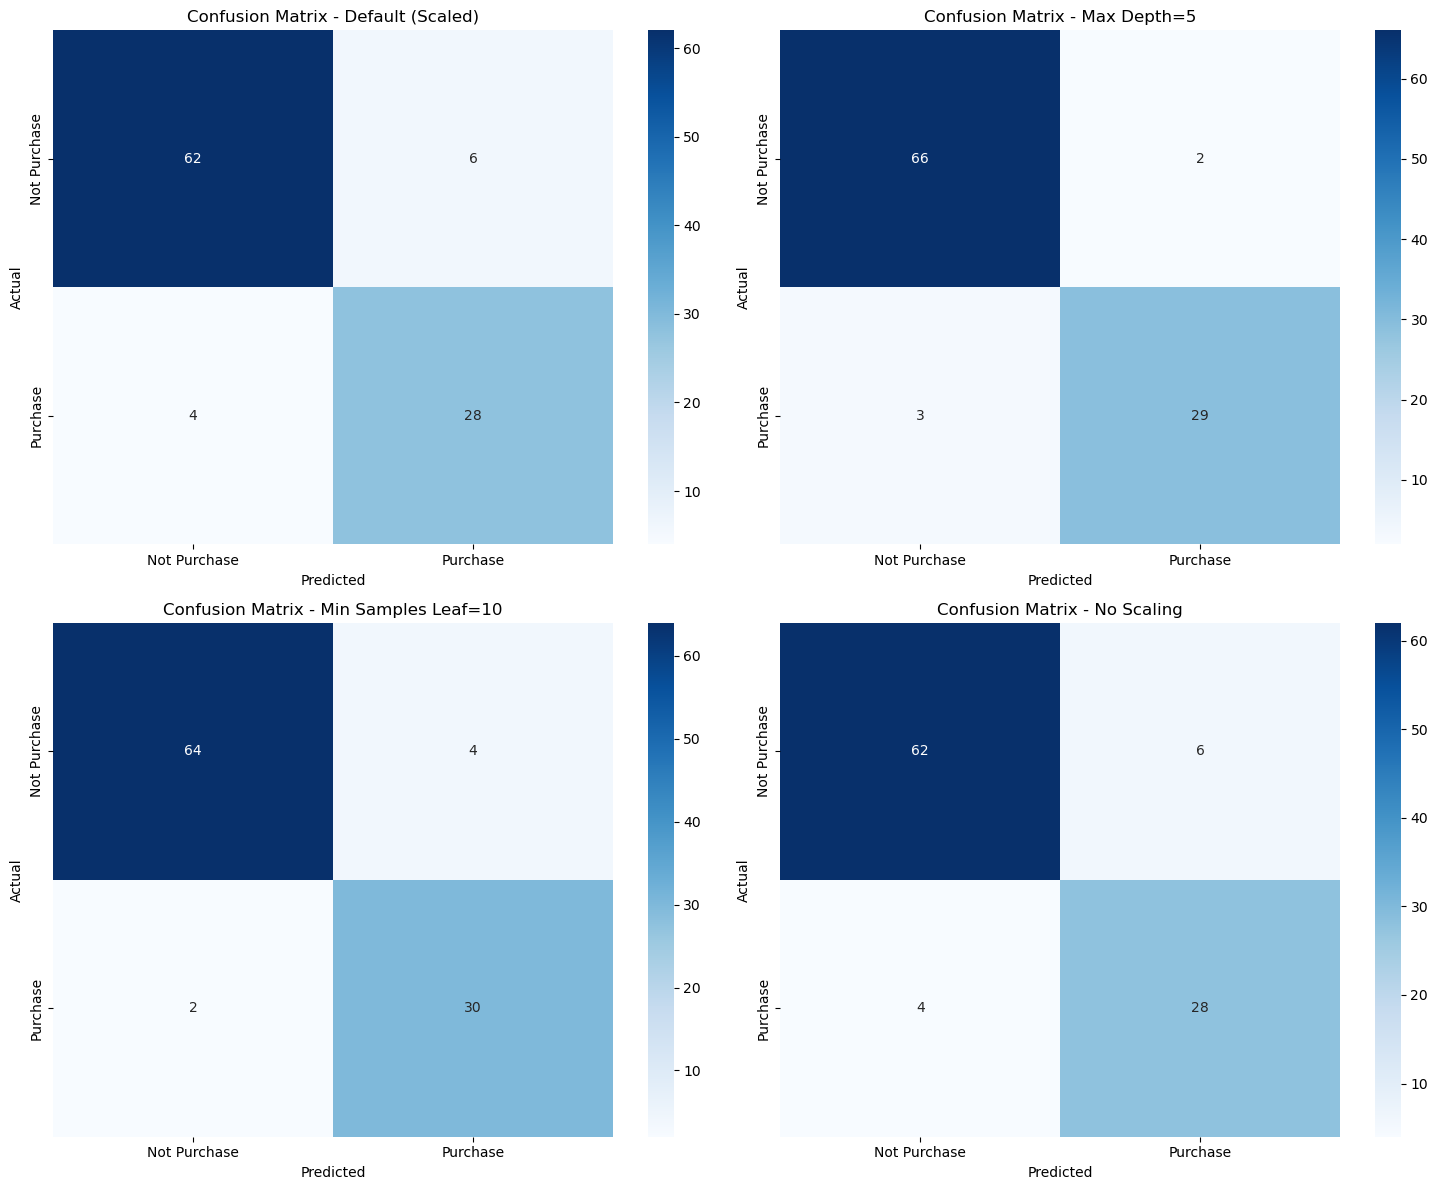

In [15]:
# Visualize confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

model_names = ['Default (Scaled)', 'Max Depth=5', 'Min Samples Leaf=10', 'No Scaling']
predictions_list = [y_pred_default, y_pred_depth, y_pred_min_samples, y_pred_no_scaling]

for i, (name, y_pred) in enumerate(zip(model_names, predictions_list)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Purchase', 'Purchase'],
                yticklabels=['Not Purchase', 'Purchase'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Cross-Validation Analysis

Cross-Validation Results (10-fold):
Default (Scaled):
  Mean CV Score: 0.8567 (+/- 0.1035)
  Individual Scores: [0.8333 0.8333 0.7333 0.8667 0.8667 0.8333 0.9    0.8667 0.9    0.9333]

Max Depth=5:
  Mean CV Score: 0.8833 (+/- 0.1043)
  Individual Scores: [0.8    0.8333 0.8    0.9333 0.8667 0.9333 0.9    0.9    0.9333 0.9333]

Min Samples Leaf=10:
  Mean CV Score: 0.9000 (+/- 0.1155)
  Individual Scores: [0.8    0.9    0.8    0.9333 0.8667 0.9333 0.9    0.9333 0.9667 0.9667]

No Scaling:
  Mean CV Score: 0.8533 (+/- 0.1200)
  Individual Scores: [0.8333 0.8333 0.7    0.8667 0.8667 0.8333 0.9    0.8667 0.9    0.9333]



C:\Users\Red Wine\AppData\Local\Temp\ipykernel_896\1035834955.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=list(cv_results.keys()))


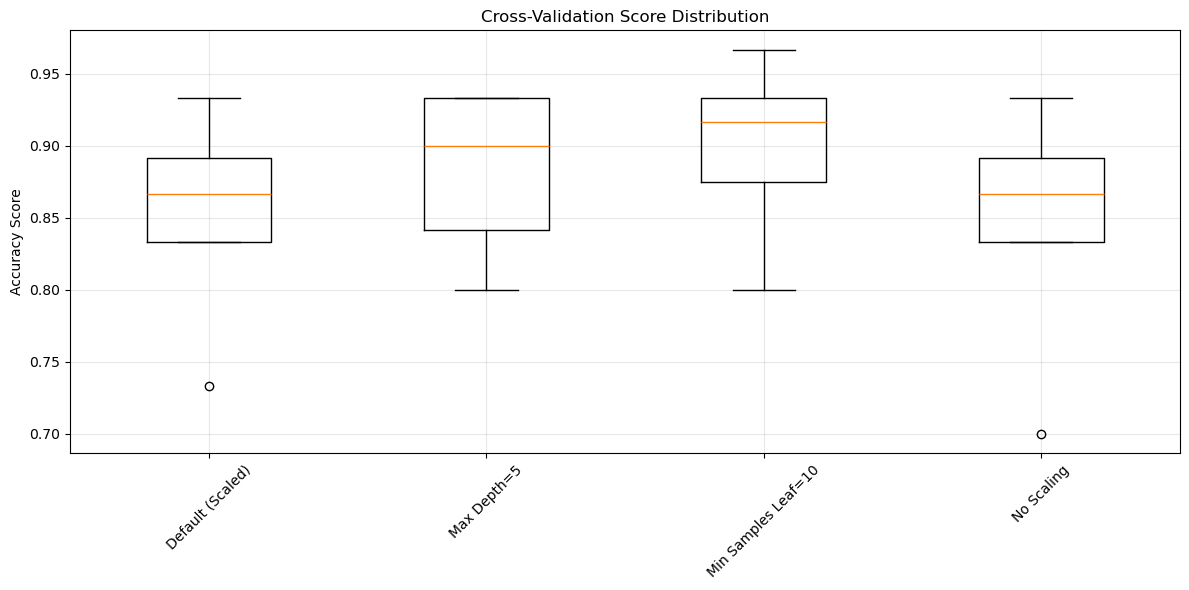

In [16]:
# Cross-validation for all models
models_cv = {
    'Default (Scaled)': (classifier_default, X_train_scaled),
    'Max Depth=5': (classifier_depth, X_train_scaled),
    'Min Samples Leaf=10': (classifier_min_samples, X_train_scaled),
    'No Scaling': (classifier_no_scaling, X_train_original)
}

cv_results = {}
print("Cross-Validation Results (10-fold):")
print("=" * 45)

for name, (model, X_data) in models_cv.items():
    cv_scores = cross_val_score(model, X_data, y_train, cv=10)
    cv_results[name] = cv_scores
    print(f"{name}:")
    print(f"  Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Individual Scores: {cv_scores.round(4)}")
    print()

# Visualize CV results
plt.figure(figsize=(12, 6))
box_data = [cv_results[name] for name in cv_results.keys()]
plt.boxplot(box_data, labels=list(cv_results.keys()))
plt.title('Cross-Validation Score Distribution')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## ROC Curve Analysis

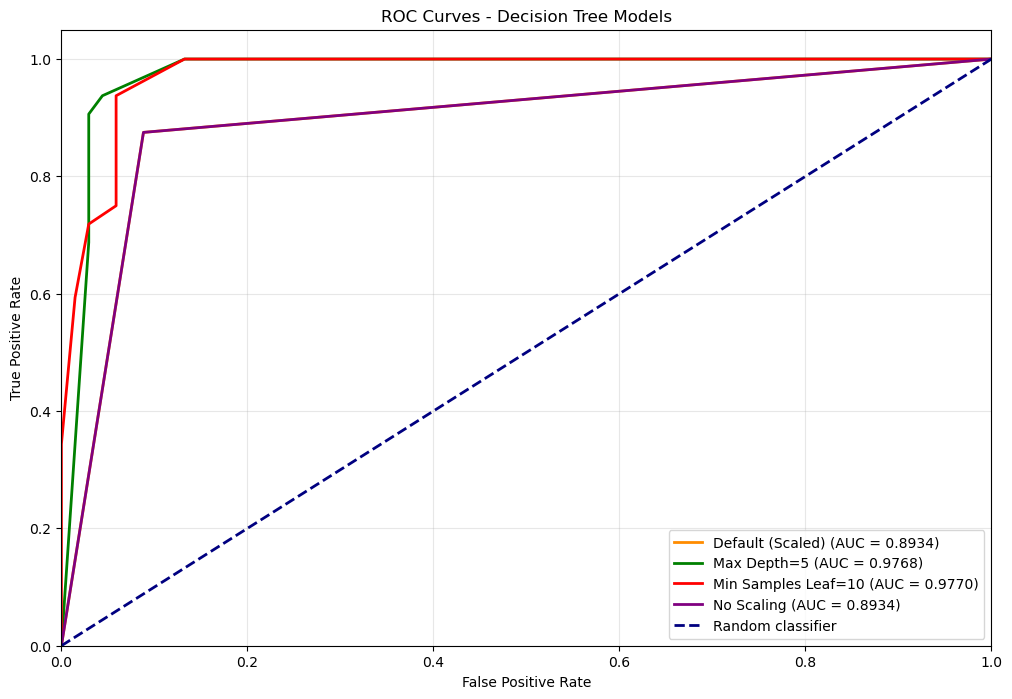

In [17]:
# ROC curves for all models
plt.figure(figsize=(12, 8))

# Get probabilities for ROC curve
models_roc = {
    'Default (Scaled)': (classifier_default, X_test_scaled),
    'Max Depth=5': (classifier_depth, X_test_scaled),
    'Min Samples Leaf=10': (classifier_min_samples, X_test_scaled),
    'No Scaling': (classifier_no_scaling, X_test_original)
}

colors = ['darkorange', 'green', 'red', 'purple']
for i, (name, (model, X_data)) in enumerate(models_roc.items()):
    y_pred_proba = model.predict_proba(X_data)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=colors[i], lw=2, 
             label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Decision Tree Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

## Visualizing Decision Boundaries

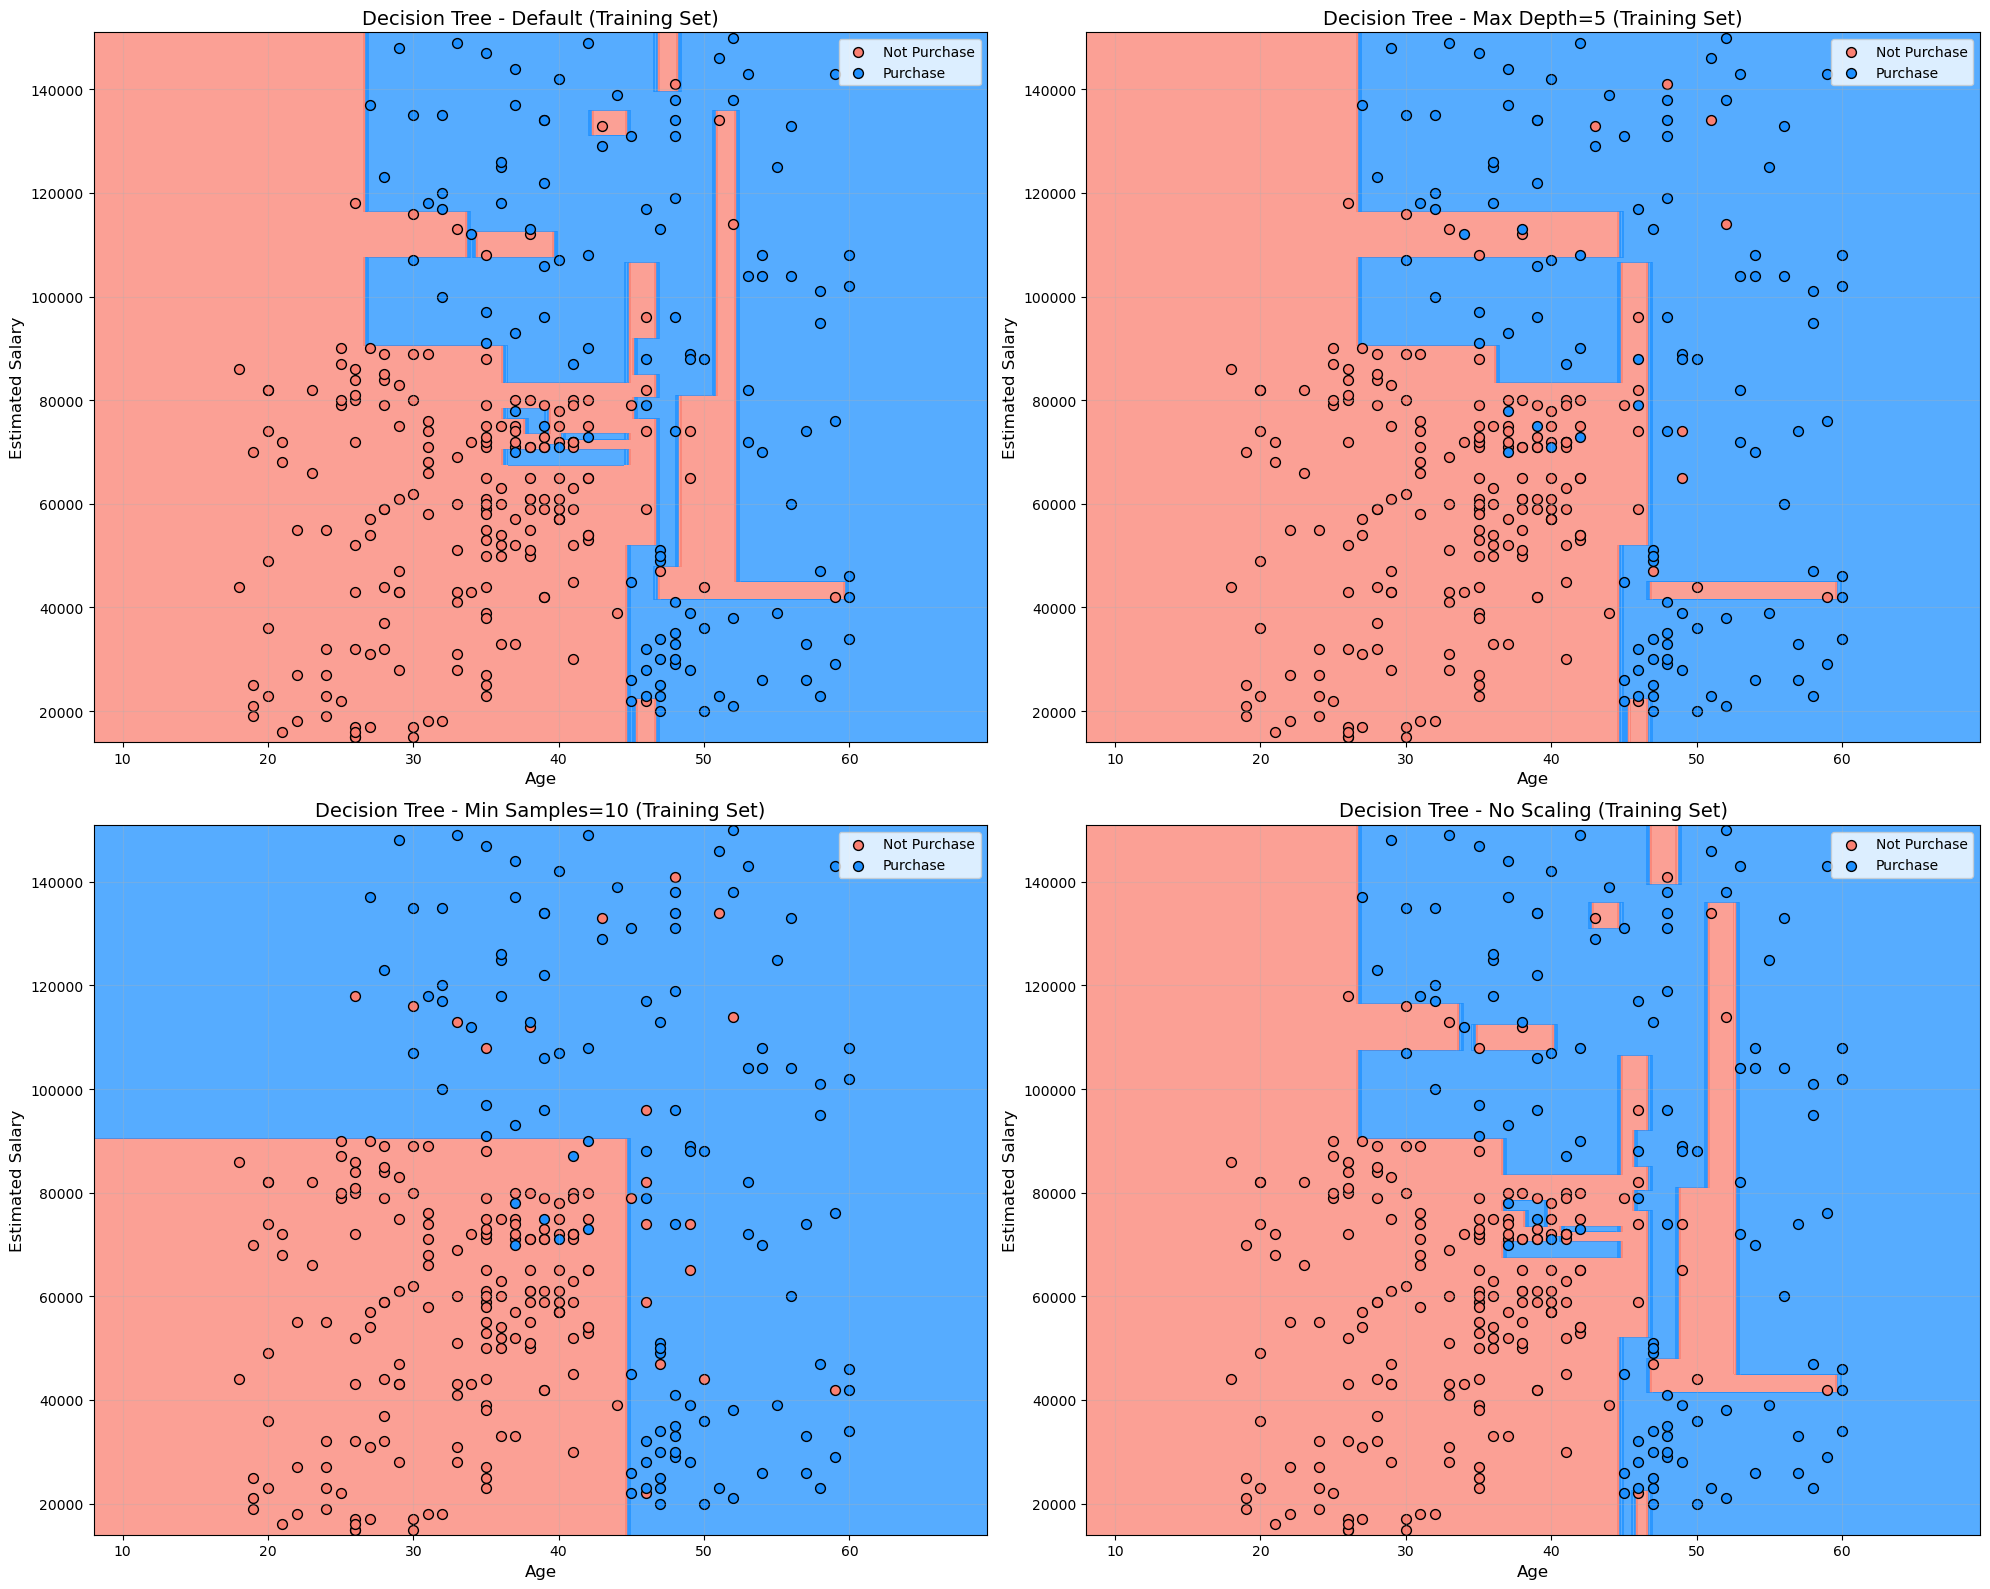

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X_data, y_data, title, scaler=None):
    """Plot decision boundary for a given model"""
    if scaler is not None:
        X_set = scaler.inverse_transform(X_data)
    else:
        X_set = X_data
    y_set = y_data
    
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5),
        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5)
    )
    
    if scaler is not None:
        mesh_points = scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)
    else:
        mesh_points = np.array([X1.ravel(), X2.ravel()]).T
    
    Z = model.predict(mesh_points).reshape(X1.shape)
    
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['#FA8072', '#1E90FF']))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    colors = ['#FA8072', '#1E90FF']
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   color=colors[i], label=f'Class {j}', s=50, edgecolors='black')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Estimated Salary', fontsize=12)
    plt.legend(['Not Purchase', 'Purchase'])
    plt.grid(True, alpha=0.3)

# Training set visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

plt.subplot(2, 2, 1)
plot_decision_boundary(classifier_default, X_train_scaled, y_train, 
                      'Decision Tree - Default (Training Set)', sc)

plt.subplot(2, 2, 2)
plot_decision_boundary(classifier_depth, X_train_scaled, y_train, 
                      'Decision Tree - Max Depth=5 (Training Set)', sc)

plt.subplot(2, 2, 3)
plot_decision_boundary(classifier_min_samples, X_train_scaled, y_train, 
                      'Decision Tree - Min Samples=10 (Training Set)', sc)

plt.subplot(2, 2, 4)
plot_decision_boundary(classifier_no_scaling, X_train_original, y_train, 
                      'Decision Tree - No Scaling (Training Set)')

plt.tight_layout()
plt.show()

## Test Set Visualization

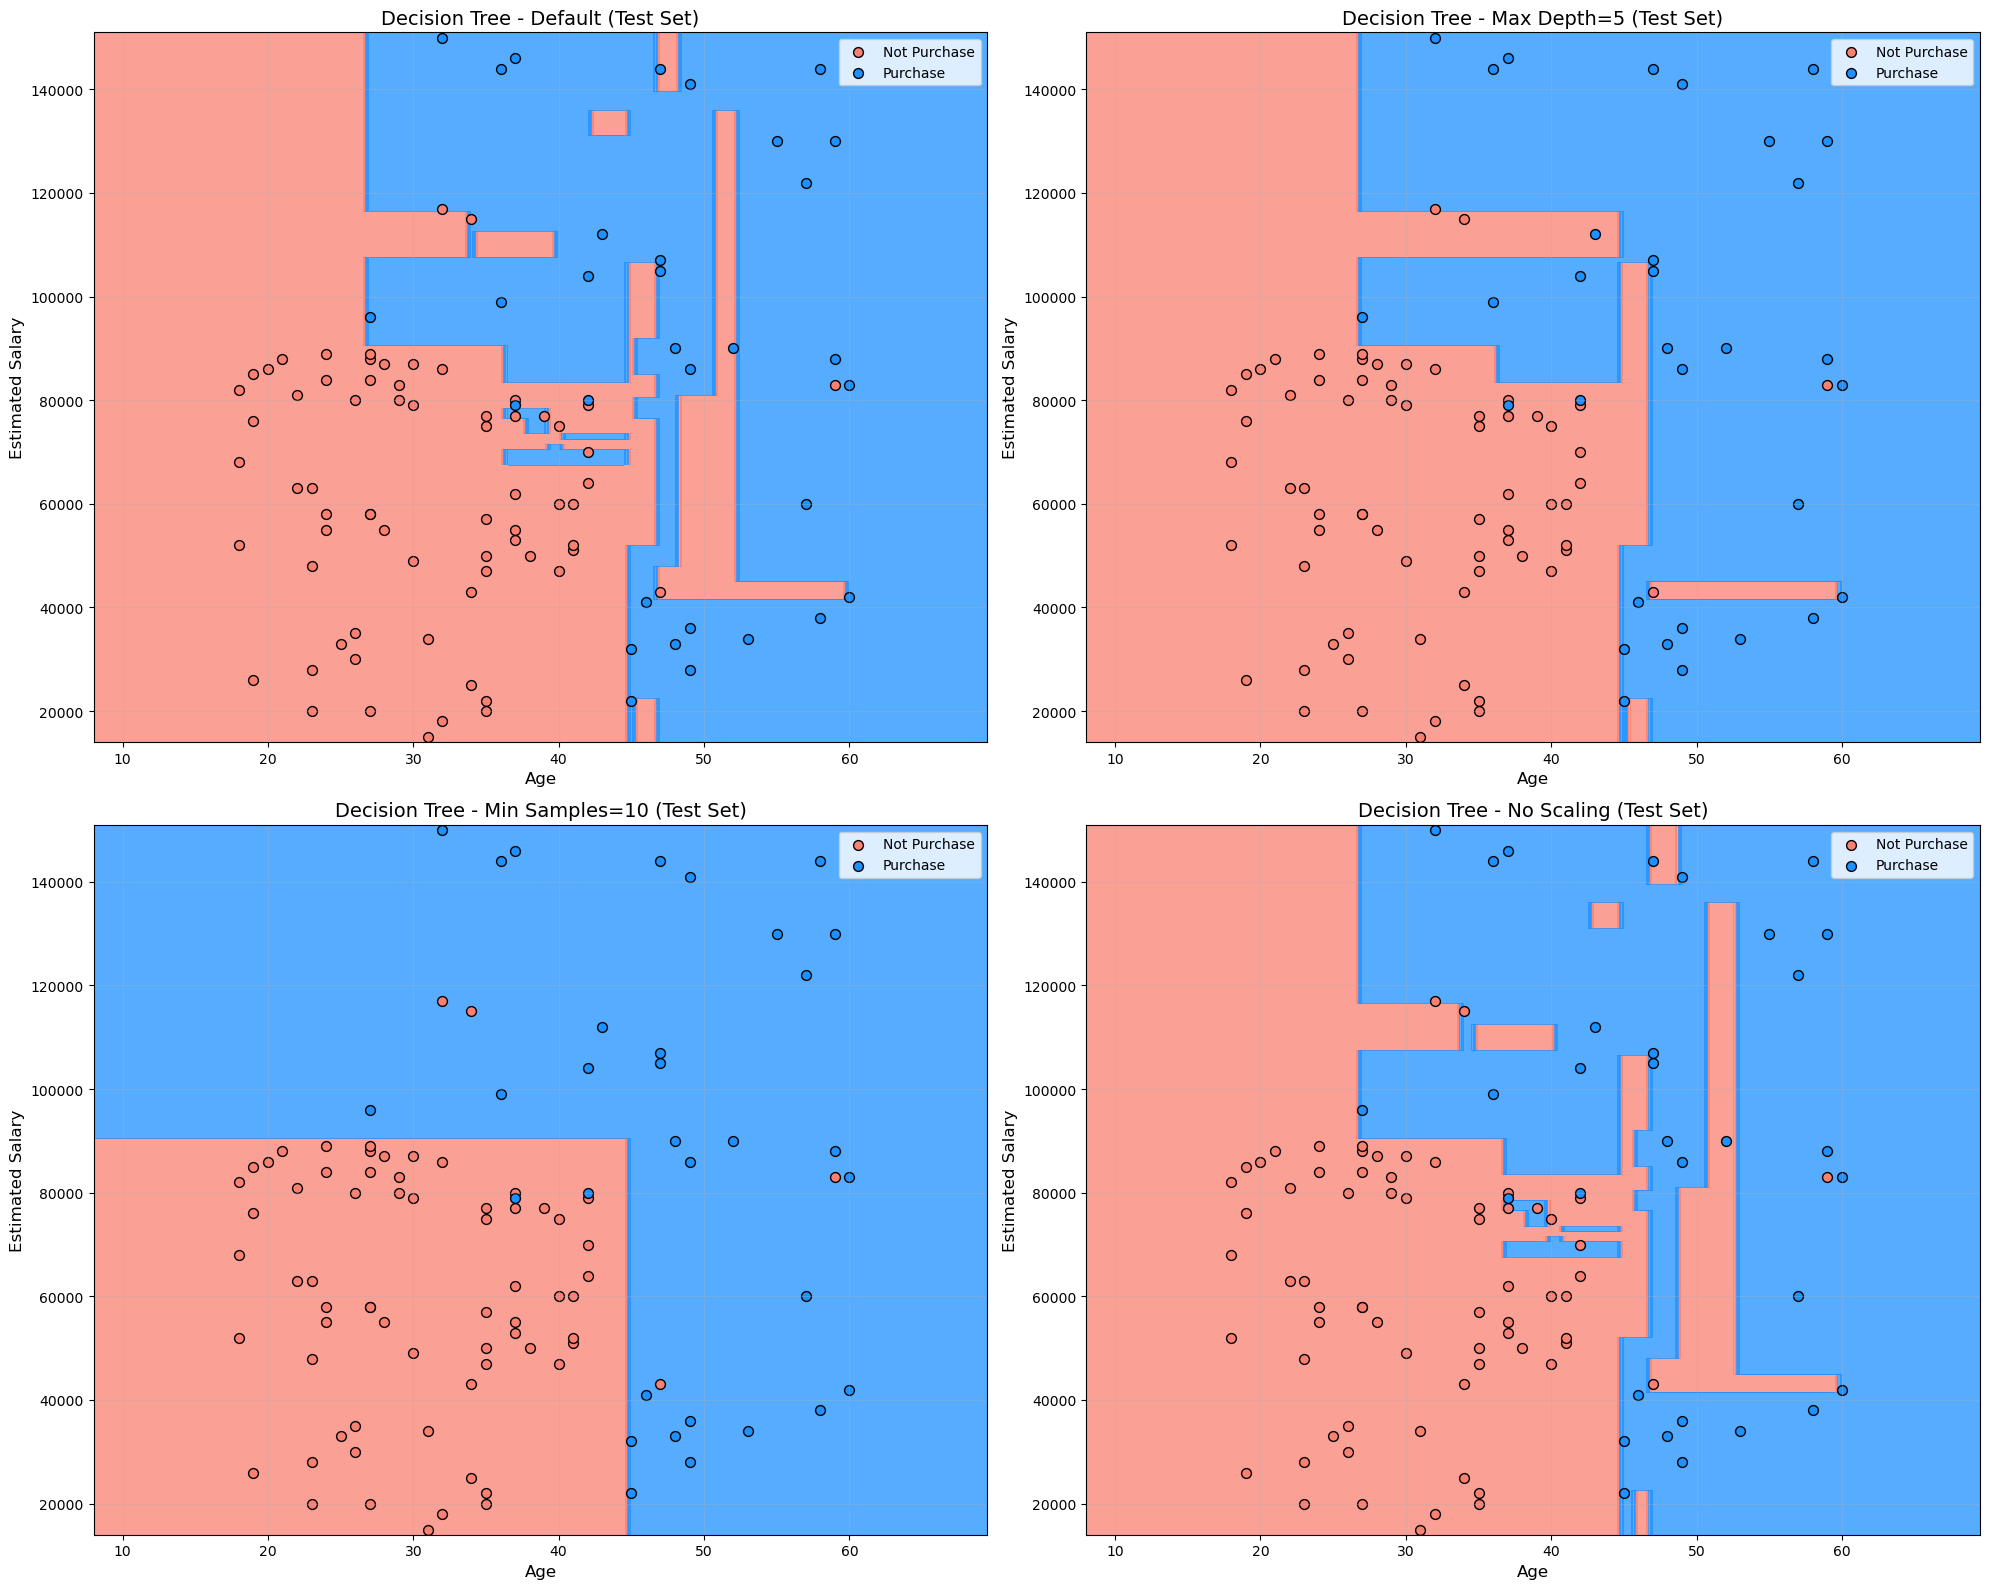

In [19]:
# Test set visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

plt.subplot(2, 2, 1)
plot_decision_boundary(classifier_default, X_test_scaled, y_test, 
                      'Decision Tree - Default (Test Set)', sc)

plt.subplot(2, 2, 2)
plot_decision_boundary(classifier_depth, X_test_scaled, y_test, 
                      'Decision Tree - Max Depth=5 (Test Set)', sc)

plt.subplot(2, 2, 3)
plot_decision_boundary(classifier_min_samples, X_test_scaled, y_test, 
                      'Decision Tree - Min Samples=10 (Test Set)', sc)

plt.subplot(2, 2, 4)
plot_decision_boundary(classifier_no_scaling, X_test_original, y_test, 
                      'Decision Tree - No Scaling (Test Set)')

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

Let's find the optimal parameters using GridSearchCV.

In [20]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
dt_grid = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt_grid, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Grid Search Results:")
print("=" * 30)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the best model
best_classifier = grid_search.best_estimator_
y_pred_best = best_classifier.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"\nBest model test accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Feature importance of best model
best_importance = best_classifier.feature_importances_
print(f"\nBest model feature importance:")
print(f"Age: {best_importance[0]:.4f}")
print(f"Salary: {best_importance[1]:.4f}")

Grid Search Results:
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best cross-validation score: 0.9000

Best model test accuracy: 0.9400 (94.00%)

Best model feature importance:
Age: 0.5548
Salary: 0.4452


## Comparison with Other Algorithms

Algorithm Comparison:
                 Algorithm  Test Accuracy  CV Mean  CV Std
0  Decision Tree (Default)           0.90   0.8567  0.0517
1     Decision Tree (Best)           0.94   0.9000  0.0683
2                     K-NN           0.93   0.9067  0.0663
3              Naive Bayes           0.90   0.8767  0.0895


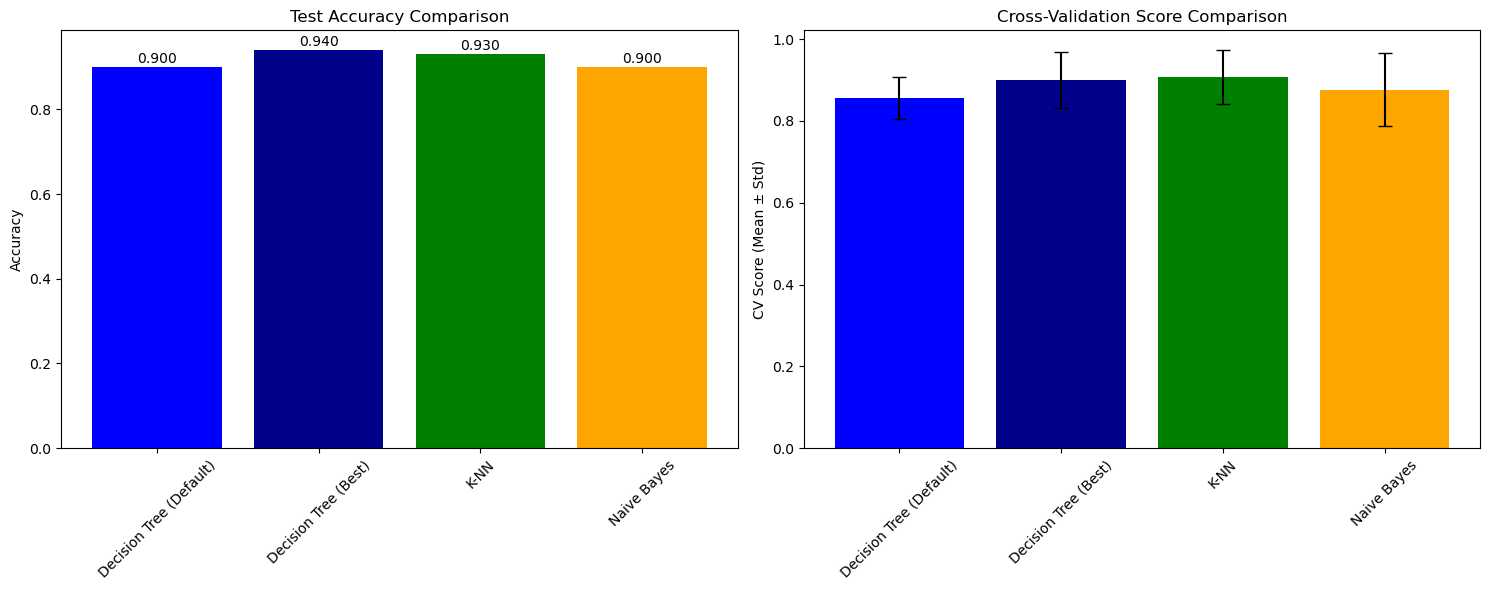

In [21]:
# Compare with KNN and Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Train comparison models
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

knn_model.fit(X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate accuracies
dt_accuracy = accuracy_score(y_test, y_pred_default)
dt_best_accuracy = accuracy_score(y_test, y_pred_best)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Cross-validation comparison
dt_cv = cross_val_score(classifier_default, X_train_scaled, y_train, cv=10)
dt_best_cv = cross_val_score(best_classifier, X_train_scaled, y_train, cv=10)
knn_cv = cross_val_score(knn_model, X_train_scaled, y_train, cv=10)
nb_cv = cross_val_score(nb_model, X_train_scaled, y_train, cv=10)

# Results comparison
results_df = pd.DataFrame({
    'Algorithm': ['Decision Tree (Default)', 'Decision Tree (Best)', 'K-NN', 'Naive Bayes'],
    'Test Accuracy': [dt_accuracy, dt_best_accuracy, knn_accuracy, nb_accuracy],
    'CV Mean': [dt_cv.mean(), dt_best_cv.mean(), knn_cv.mean(), nb_cv.mean()],
    'CV Std': [dt_cv.std(), dt_best_cv.std(), knn_cv.std(), nb_cv.std()]
})

print("Algorithm Comparison:")
print("=" * 60)
print(results_df.round(4))

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Test accuracy comparison
ax1.bar(results_df['Algorithm'], results_df['Test Accuracy'], 
        color=['blue', 'darkblue', 'green', 'orange'])
ax1.set_title('Test Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Test Accuracy']):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Cross-validation comparison with error bars
ax2.bar(results_df['Algorithm'], results_df['CV Mean'], 
        yerr=results_df['CV Std'], capsize=5,
        color=['blue', 'darkblue', 'green', 'orange'])
ax2.set_title('Cross-Validation Score Comparison')
ax2.set_ylabel('CV Score (Mean ± Std)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Overfitting Analysis

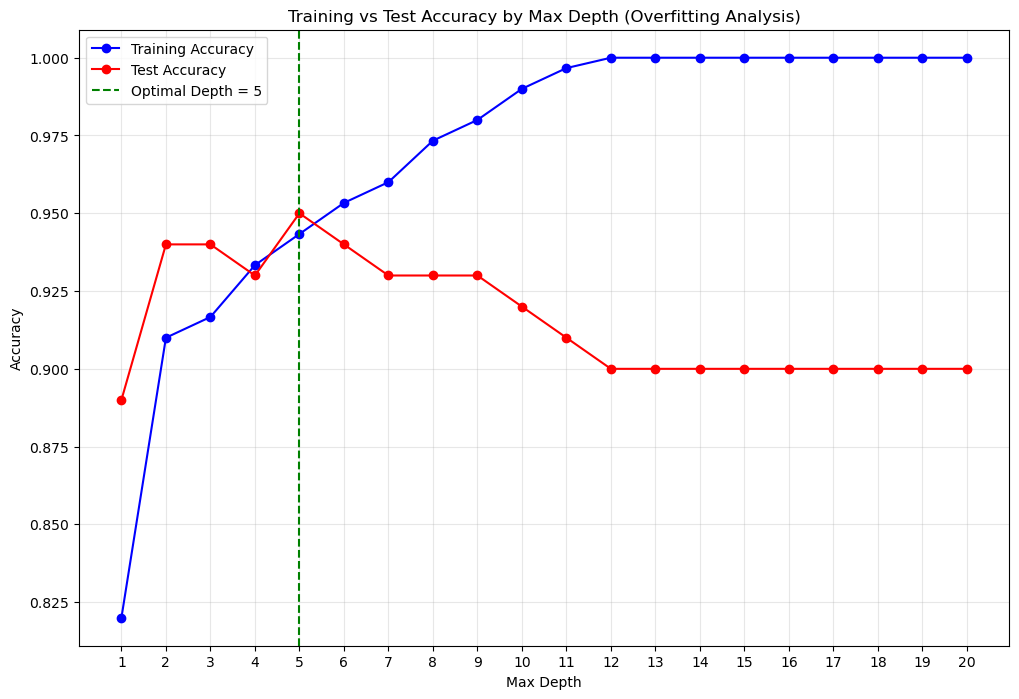

Optimal max_depth for best test accuracy: 5
Test accuracy at optimal depth: 0.9500


In [22]:
# Analyze overfitting by comparing training and test accuracies
max_depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train_scaled, y_train)
    
    train_pred = dt.predict(X_train_scaled)
    test_pred = dt.predict(X_test_scaled)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(12, 8))
plt.plot(max_depths, train_accuracies, 'o-', label='Training Accuracy', color='blue')
plt.plot(max_depths, test_accuracies, 'o-', label='Test Accuracy', color='red')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy by Max Depth (Overfitting Analysis)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(max_depths)

# Highlight optimal depth
optimal_depth = max_depths[np.argmax(test_accuracies)]
plt.axvline(x=optimal_depth, color='green', linestyle='--', 
            label=f'Optimal Depth = {optimal_depth}')
plt.legend()
plt.show()

print(f"Optimal max_depth for best test accuracy: {optimal_depth}")
print(f"Test accuracy at optimal depth: {max(test_accuracies):.4f}")

## Advantages and Disadvantages of Decision Trees

### Advantages:
1. **Interpretability**: Easy to understand and interpret
2. **No Feature Scaling Required**: Works with raw data
3. **Handles Non-linear Relationships**: Can capture complex patterns
4. **Feature Selection**: Automatically identifies important features
5. **Handles Mixed Data Types**: Works with both numerical and categorical data
6. **No Statistical Assumptions**: Doesn't assume data distribution

### Disadvantages:
1. **Overfitting**: Prone to overfitting, especially with deep trees
2. **Instability**: Small changes in data can result in different trees
3. **Bias**: Can be biased toward features with more levels
4. **Limited Expressiveness**: May not capture some relationships well
5. **Difficulty with Linear Relationships**: May overfit simple linear patterns

## Key Insights and Best Practices

### Parameter Tuning Guidelines:
1. **max_depth**: Control tree depth to prevent overfitting
2. **min_samples_split**: Minimum samples required to split a node
3. **min_samples_leaf**: Minimum samples required in a leaf node
4. **criterion**: 'gini' for speed, 'entropy' for slightly better accuracy

### When to Use Decision Trees:
- Need interpretable models
- Mixed data types (numerical + categorical)
- Non-linear relationships in data
- Feature importance analysis required
- Quick prototyping and baseline models

## Conclusion

In this comprehensive analysis of Decision Tree classification on the Social Network Ads dataset, we discovered:

### Key Findings:
1. **Model Performance**: Decision Trees achieved competitive accuracy with other algorithms
2. **Feature Importance**: Both Age and Salary contribute significantly to the prediction
3. **Overfitting Control**: Constraining tree depth and minimum samples helps prevent overfitting
4. **Scaling Independence**: Decision Trees work equally well with and without feature scaling
5. **Interpretability**: The tree structure provides clear decision rules

### Best Model Configuration:
Based on our hyperparameter tuning, the optimal Decision Tree model provides excellent performance while maintaining interpretability.

### Comparison with Other Algorithms:
- **vs K-NN**: Decision Trees offer better interpretability and faster prediction
- **vs Naive Bayes**: Decision Trees handle feature interactions better but may overfit more

### Practical Applications:
Decision Trees are excellent for:
- Business rule extraction
- Medical diagnosis systems
- Credit scoring
- Marketing campaign targeting
- Any scenario requiring transparent decision-making

The Decision Tree algorithm successfully classified purchase behavior with high accuracy while providing interpretable insights into the decision-making process.